<a href="https://colab.research.google.com/github/smit-collab/Image-Compression-using-K-Means/blob/master/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [11]:
# libraries
from __future__ import print_function
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
plt.style.use("ggplot")

from skimage import io
from sklearn.cluster import KMeans

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

In [12]:
plt.rcParams['figure.figsize'] = (20, 12)

# **Data Preprocessing**

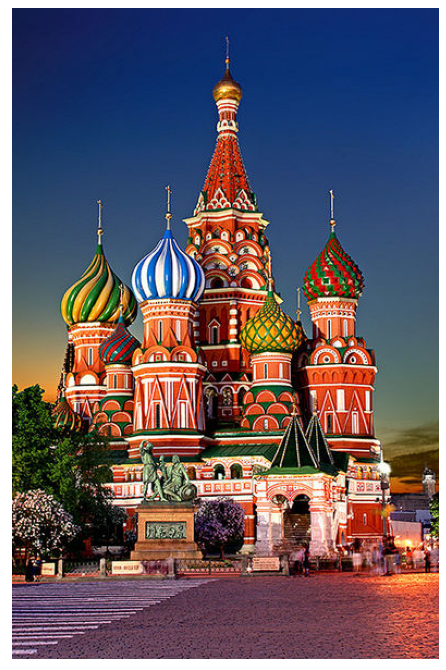

In [13]:
img = io.imread('images/1-Saint-Basils-Cathedral_random.jpg')
ax=plt.axes(xticks=[] , yticks=[]) #the axis have no ticks or numbers so the array is empty
ax.imshow(img); 

In [14]:
img.shape # has depth of 3 for 3 color channels r,g,b

(600, 394, 3)

In [15]:
"""for each color channels(3) we will convert image to one long vector
also to normalize the pixels so it is btw 0 and 1 instead of btw 0 and 255"""

# when shape of image is not known 
img_data = (img/255.0).reshape(-1,3) 

#if we know the shape of the image use below line 
# then we can write as .reshape(600*394) or let numpy handle it by writing -1

# checking the shape now
print(img_data.shape) #so it is reduced to 2D

(236400, 3)


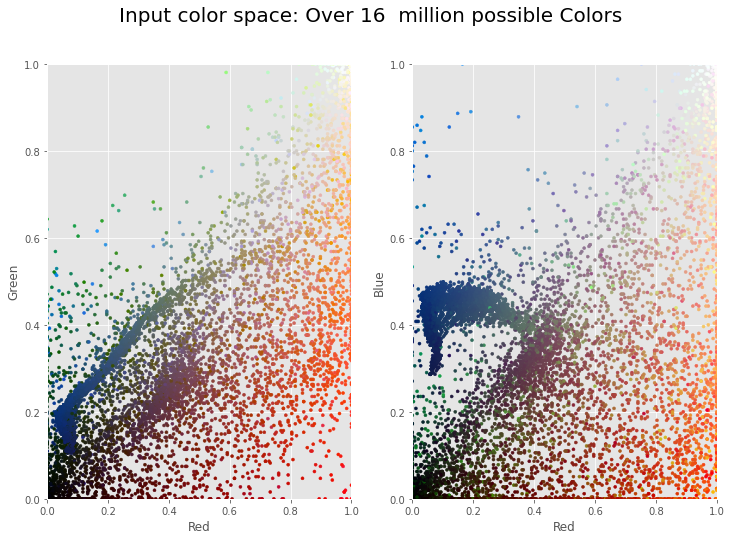

In [16]:
from plot_utils import plot_utils
x = plot_utils(img_data,title="Input color space: Over 16  million possible Colors")
x.colorSpace() 


we observe that there are many colors present so 
there is smooth transition over image from one color to another
in k means we will see that there is lack of diversity in the colors
so using k means we will reduce the colors so as to compress the image and then visualize the color space.

# **Visualizing the K-means Reduced Color Space**

**K-means Algorithm**:

1. Initialization: Randomly sample $k$ colors from the input image. These are the initial $k$ means $\mu_1,\mu_2,...,\mu_k$.


2. For each pixel in the image, assign it to its nearest mean given by $$c^{(i)} := \textrm{argmin}_{j}\left \|x^{(i)} - \mu_j \right \|^2$$


3. Update the means using the pixel assignments from Step 2. $$\mu_j := \frac{\sum_{i}^{n}1\left \{c^{(i)} = j  \right \}x^{(i)}}{\sum_{i}^{n}1\left \{c^{(i)} = j  \right \}}$$


4. Repeat Steps 2 and 3 until convergence.

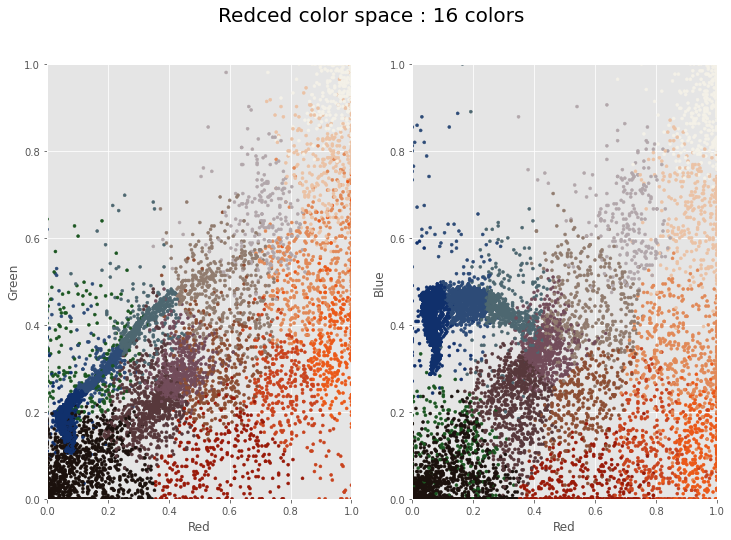

In [17]:
"""
step1- so intitlally we select k=16 points on the original image and initializing them
with u1,u2...uk

step2 - for remaining pixels assign to nearest mean. i.e find distance from the remaining
pixel to the initialzied ones.
"""

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16).fit(img_data)
k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]

y = plot_utils(img_data,colors=k_colors , title = "Redced color space : 16 colors")
y.colorSpace()




now we can see clear transitions from one color to other and also not so rich in colors as there are only 16 colors.


# **K-means Image Compression with Interactive Controls**

In [18]:
img_dir = 'images/'

@interact # to make the arguments of the below function interact.
def color_compression(image=os.listdir(img_dir) , k = IntSlider(min=1,max=256 , step=1, 
                      value=16 , continuous_update = False ,
                     layout=dict(width='100%'))):
                      # continous_update means keep updating the fun when moving the slider
                      #which we want a false as we wann update the fun when we release the slider,
    
    input_img = io.imread(img_dir+image)
    img_data = (input_img/255.0).reshape(-1,3)
    
    kmeans = MiniBatchKMeans(k).fit(img_data)
    
#     we use k means assignment we look at cluster centers and use k means
#     to predict new color assignments on orignal img 
    k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]
    
#     recolor images and reshape it and see compressed and original img side by side
    k_img = np.reshape(k_colors , (input_img.shape))
#     creating subplot now for plotting both images
    fig , (ax1,ax2) = plt.subplots(1,2) #1 row 2 col
    fig.suptitle('K-Means Image Compression' , fontsize=20)

    ax1.set_title('Compressed Image :')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(k_img)


    ax2.set_title('Original Image (16 , 777,216) colors:')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.imshow(input_img)

    plt.subplots_adjust(top=0.85)
    plt.show()



    

interactive(children=(Dropdown(description='image', options=('1-Saint-Basils-Cathedral_random.jpg', '3-messi_i…

there is sharpness in the image and there are fuzzy lines in compress whereas orignial image have smooth transition of colors.

default is 16 clusters or 16 colors.
k means unsupervised algo is used to sperate unlabelled data like image colors into distinct groups.

we have  pixels as a group in an image by their similar id in color in order to reduce the total no of colors in that image.